In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
fraud = pd.read_csv('E:/Projects/Fraud/bet.csv')

In [3]:
#first 5 dataset
fraud.head()

,CustomerID,Age,Gender,Nr_Deposits_Approved,Nr_Deposits_Rejected,Total_Pending_Deposits,Nr_Bets_Sports,Nr_Distinct_Payment_Methods,Nr_days_without_activity,Fraud
0,#009021,29,M,1,4,6188,7,3,216,0
1,#009022,35,M,6,1,6040,1,2,228,0
2,#009023,41,M,4,2,11784,1,1,121,0
3,#009024,49,M,1,3,13157,3,4,108,0
4,#009025,38,M,7,3,4047,1,3,236,0


In [4]:
# Information about the null, data type and memory of the data.
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CustomerID                   228 non-null    object
 1   Age                          228 non-null    int64 
 2   Gender                       228 non-null    object
 3   Nr_Deposits_Approved         228 non-null    int64 
 4   Nr_Deposits_Rejected         228 non-null    int64 
 5   Total_Pending_Deposits       228 non-null    int64 
 6   Nr_Bets_Sports               228 non-null    int64 
 7   Nr_Distinct_Payment_Methods  228 non-null    int64 
 8   Nr_days_without_activity     228 non-null    int64 
 9   Fraud                        228 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 17.9+ KB


In [5]:
# Statistical information about the data.
fraud.describe()

,Age,Nr_Deposits_Approved,Nr_Deposits_Rejected,Total_Pending_Deposits,Nr_Bets_Sports,Nr_Distinct_Payment_Methods,Nr_days_without_activity,Fraud
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,34.043860,4.087719,3.934211,8466.192982,5.600877,2.526316,179.276316,0.030702
std,9.278738,2.058875,1.957717,3850.039831,2.995356,1.120183,105.220046,0.172888
min,18.000000,1.000000,1.000000,2054.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,2.000000,2.000000,5182.750000,3.000000,2.000000,91.500000,0.000000
50%,33.000000,4.000000,4.000000,8329.000000,5.500000,2.500000,187.500000,0.000000
75%,41.000000,6.000000,6.000000,11785.500000,8.000000,4.000000,268.250000,0.000000
max,50.000000,7.000000,7.000000,15000.000000,10.000000,4.000000,364.000000,1.000000


In [6]:
#shape of the data
fraud.shape

(228, 10)

# Auto Exploratory Data Analysis(EDA)

In [7]:
import sys

from pandas_profiling import ProfileReport
fd = ProfileReport(fraud)
fd.to_file(output_file = 'fraud.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-Processing

In [8]:
#view the columns
fraud.columns

Index(['CustomerID', 'Age', 'Gender', 'Nr_Deposits_Approved',
       'Nr_Deposits_Rejected', 'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity', 'Fraud'],
      dtype='object')

In [9]:
fraud.drop(columns = 'CustomerID', inplace = True)
fraud.shape

(228, 9)

In [10]:
fraud

,Age,Gender,Nr_Deposits_Approved,Nr_Deposits_Rejected,Total_Pending_Deposits,Nr_Bets_Sports,Nr_Distinct_Payment_Methods,Nr_days_without_activity,Fraud
0,29,M,1,4,6188,7,3,216,0
1,35,M,6,1,6040,1,2,228,0
2,41,M,4,2,11784,1,1,121,0
3,49,M,1,3,13157,3,4,108,0
4,38,M,7,3,4047,1,3,236,0
...,...,...,...,...,...,...,...,...,...
223,50,F,4,3,4015,10,2,307,0
224,47,M,3,3,4956,1,4,107,0
225,23,M,5,2,6512,3,2,345,0
226,29,M,7,1,14141,8,3,88,0


In [11]:
#check for missing values
fraud.isna().sum()

Age                            0
Gender                         0
Nr_Deposits_Approved           0
Nr_Deposits_Rejected           0
Total_Pending_Deposits         0
Nr_Bets_Sports                 0
Nr_Distinct_Payment_Methods    0
Nr_days_without_activity       0
Fraud                          0
dtype: int64

In [12]:
#check for duplicates
fraud.duplicated().sum()

0

In [13]:
#convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

fraud['Gender'] = lb.fit_transform(fraud['Gender'])

In [14]:
fraud

,Age,Gender,Nr_Deposits_Approved,Nr_Deposits_Rejected,Total_Pending_Deposits,Nr_Bets_Sports,Nr_Distinct_Payment_Methods,Nr_days_without_activity,Fraud
0,29,1,1,4,6188,7,3,216,0
1,35,1,6,1,6040,1,2,228,0
2,41,1,4,2,11784,1,1,121,0
3,49,1,1,3,13157,3,4,108,0
4,38,1,7,3,4047,1,3,236,0
...,...,...,...,...,...,...,...,...,...
223,50,0,4,3,4015,10,2,307,0
224,47,1,3,3,4956,1,4,107,0
225,23,1,5,2,6512,3,2,345,0
226,29,1,7,1,14141,8,3,88,0


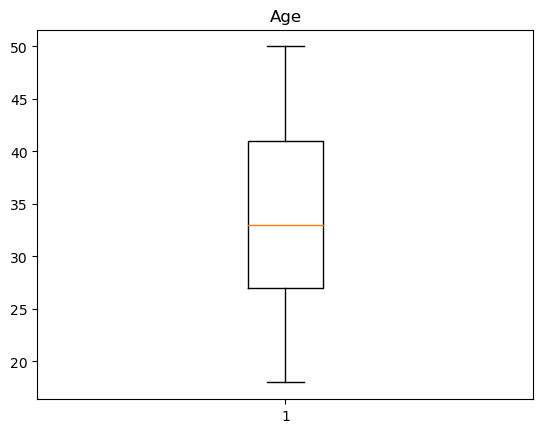

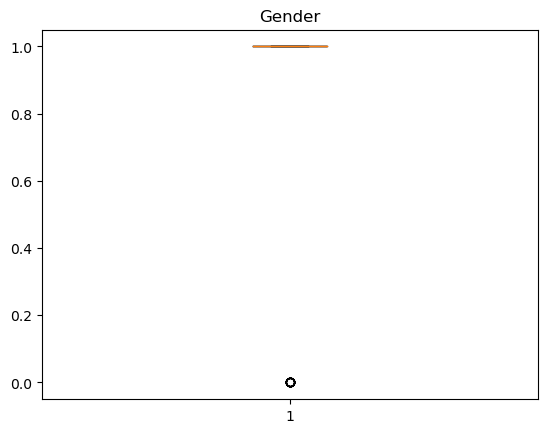

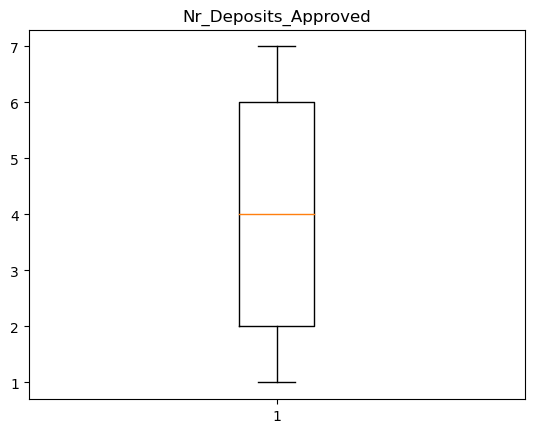

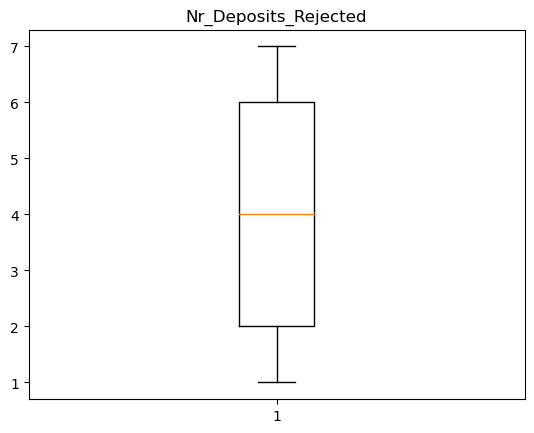

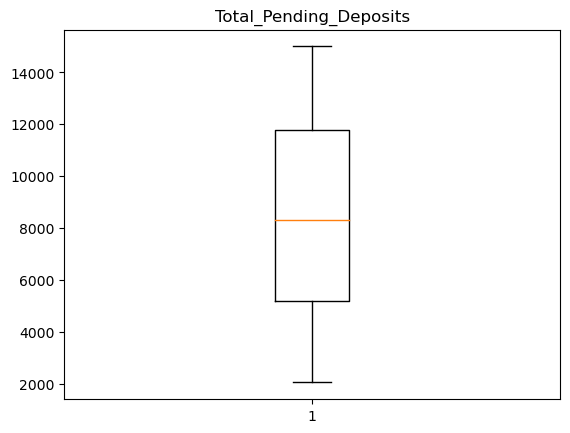

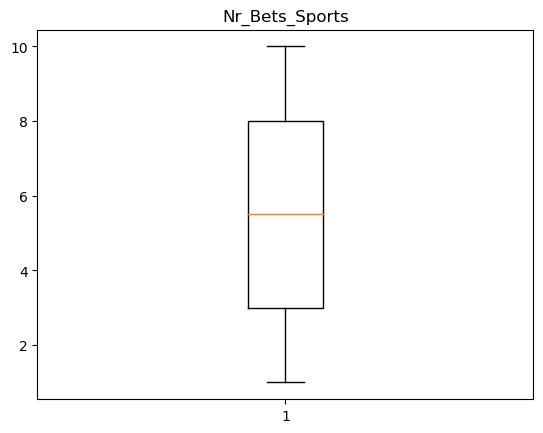

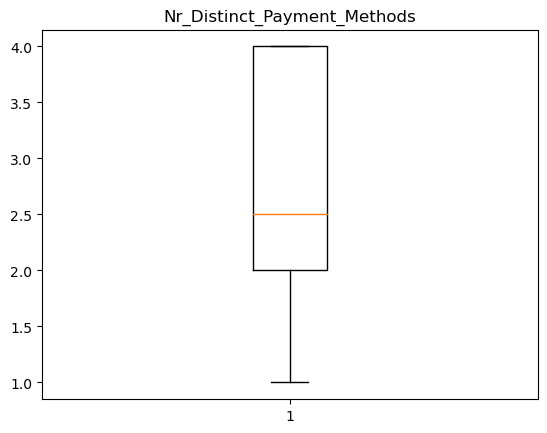

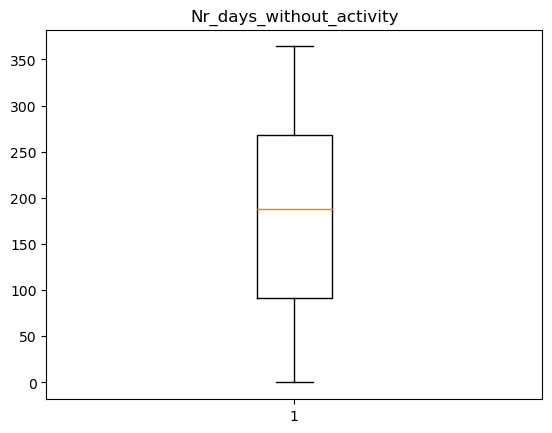

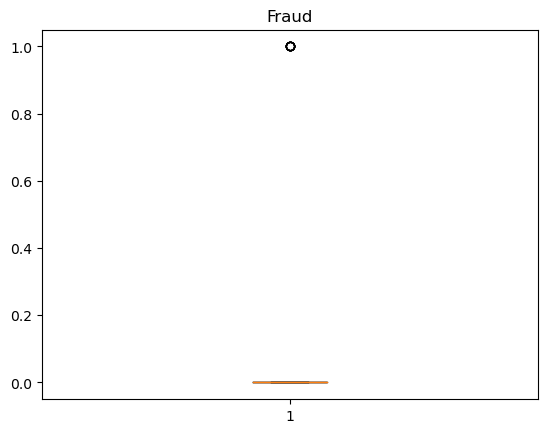

In [15]:
#Check for Outliers
col = ['Age', 'Gender', 'Nr_Deposits_Approved', 'Nr_Deposits_Rejected',
       'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity', 'Fraud']

for i in col:
    plt.boxplot(fraud[i]);
    plt.title(i);
    plt.show()

There are no outliers.

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


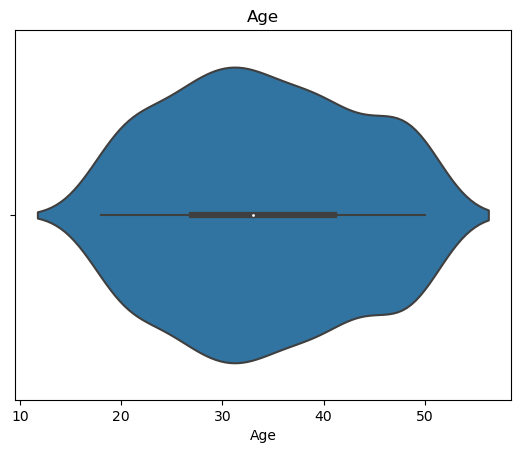

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


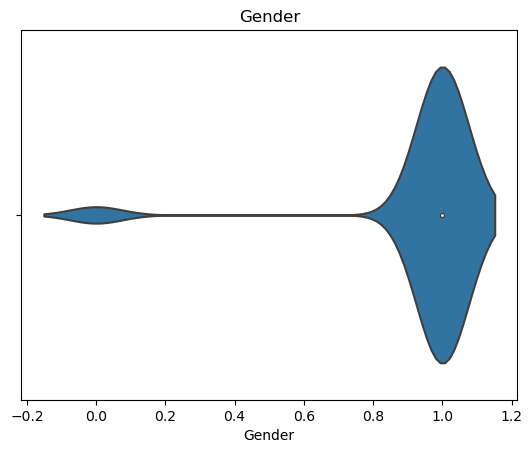

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


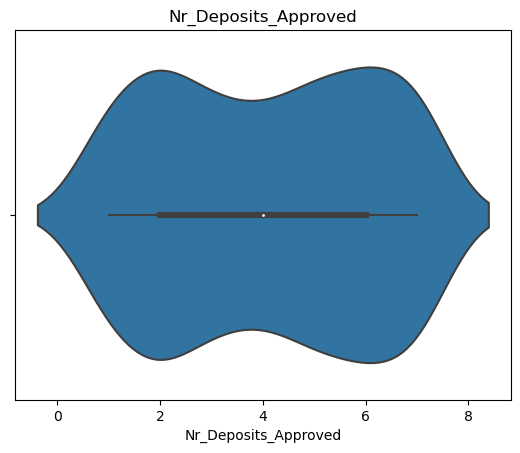

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


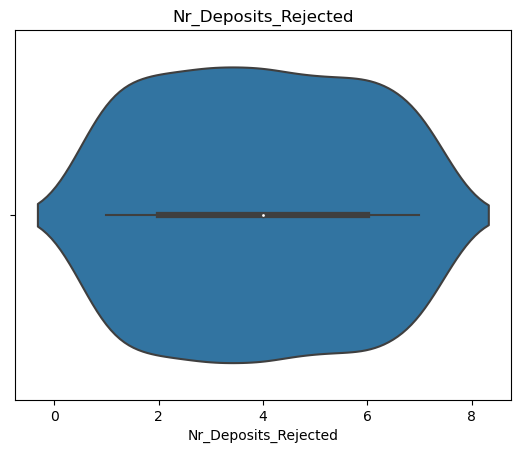

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


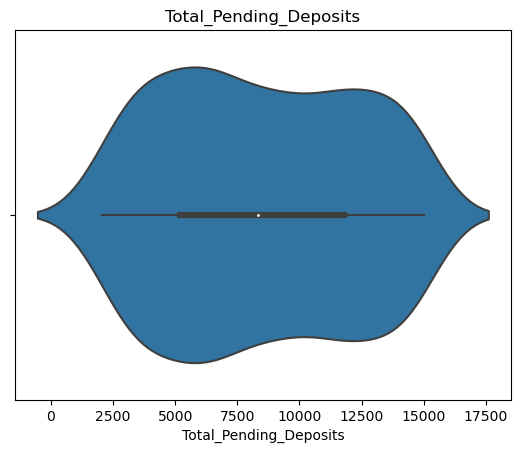

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


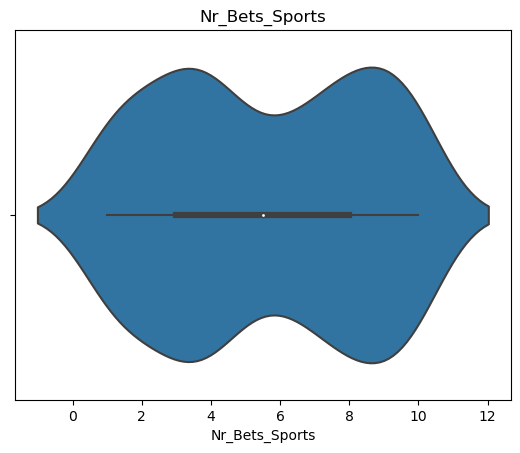

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


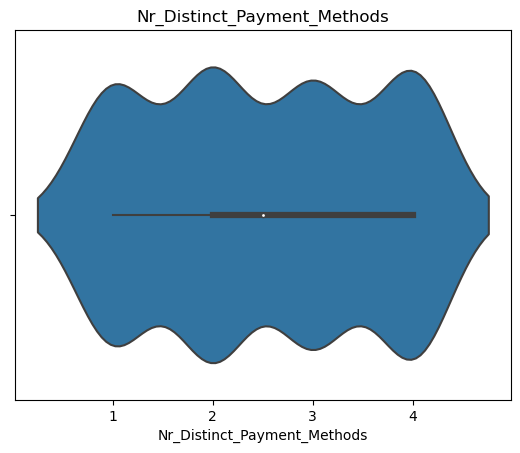

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


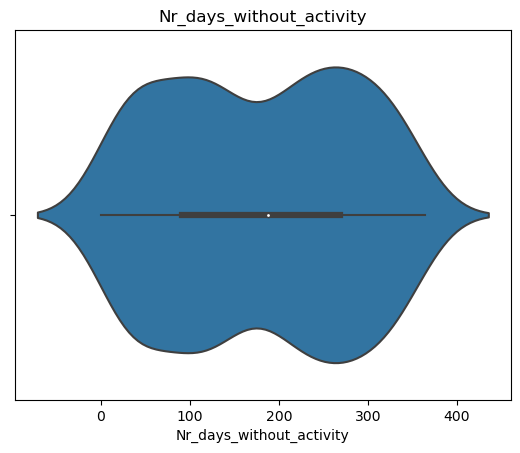

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


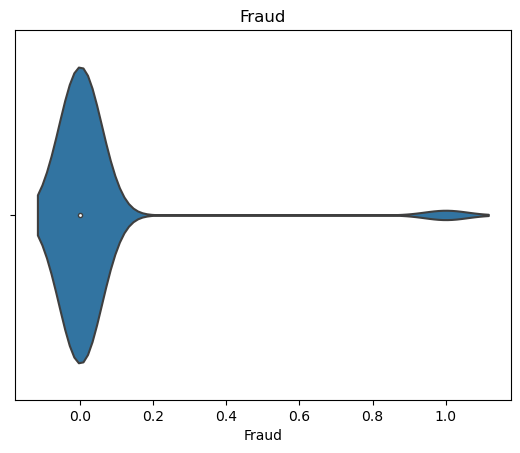

In [16]:
#violin plot
col = ['Age', 'Gender', 'Nr_Deposits_Approved', 'Nr_Deposits_Rejected',
       'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity', 'Fraud']


for i in col:
    sns.violinplot(fraud[i]);
    plt.title(i);
    plt.show()

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


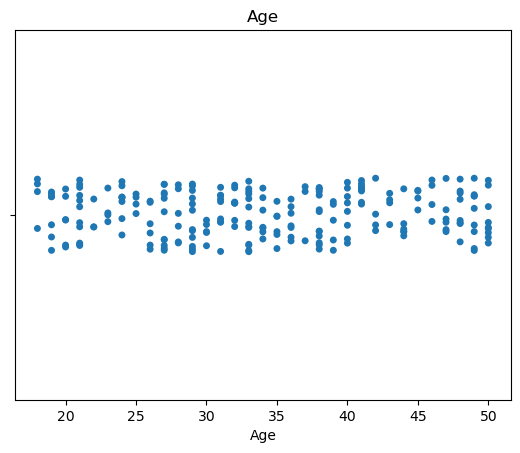

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


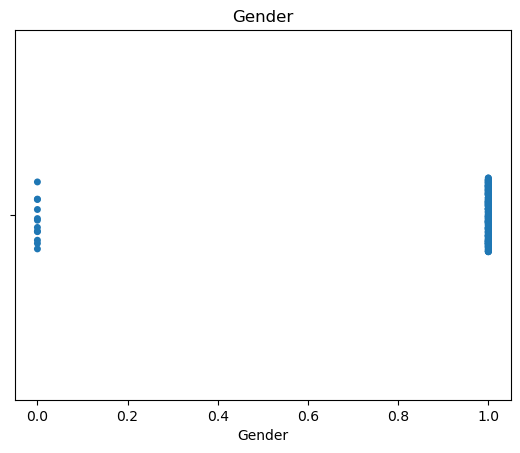

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


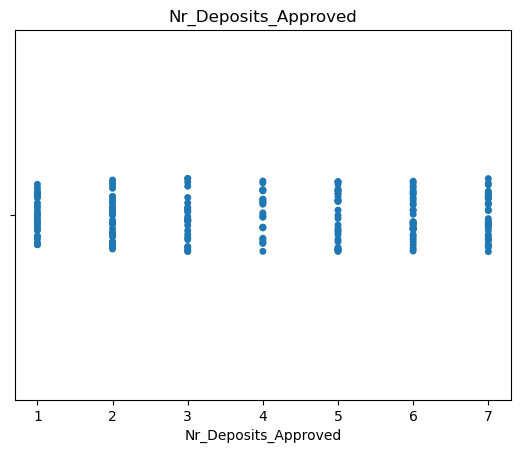

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


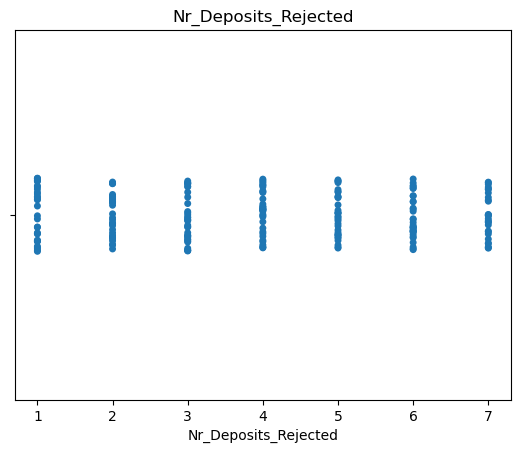

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


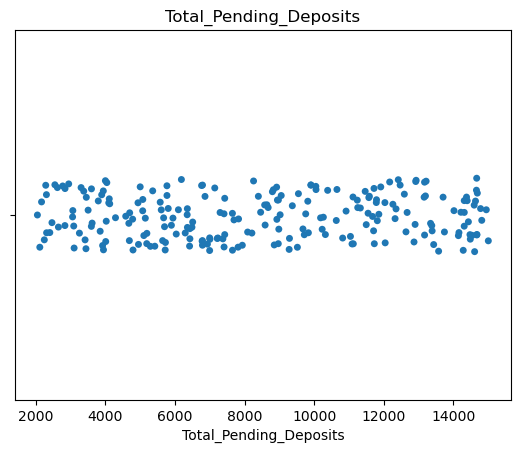

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


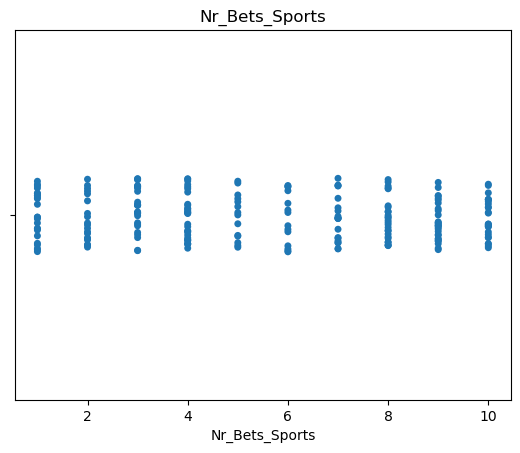

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


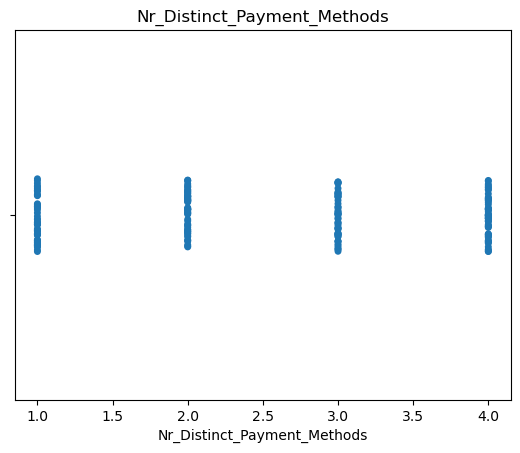

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


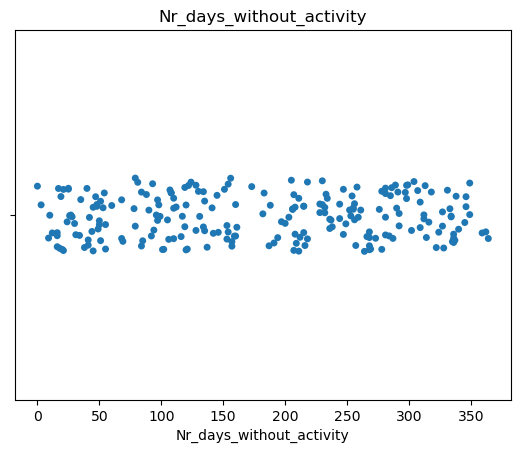

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


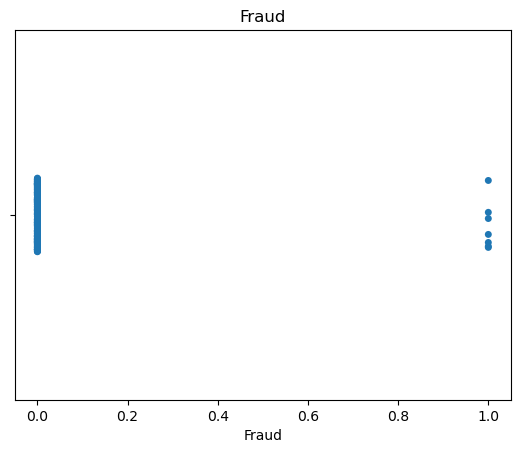

In [17]:
#stripplot
col = ['Age', 'Gender', 'Nr_Deposits_Approved', 'Nr_Deposits_Rejected',
       'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity', 'Fraud']


for i in col:
    sns.stripplot(fraud[i]);
    plt.title(i);
    plt.show()

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


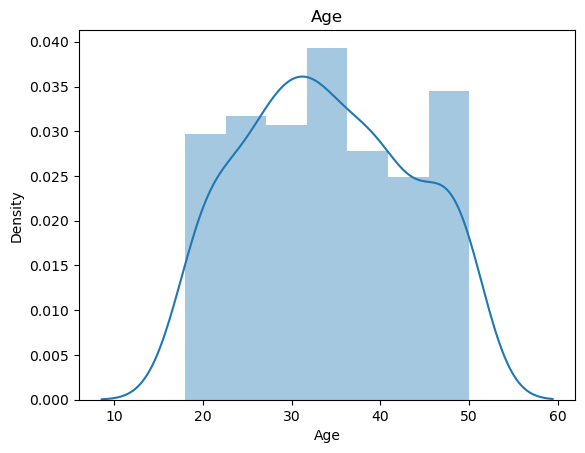

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


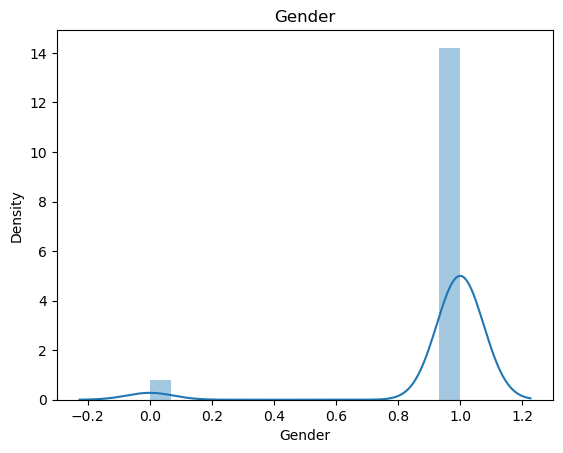

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


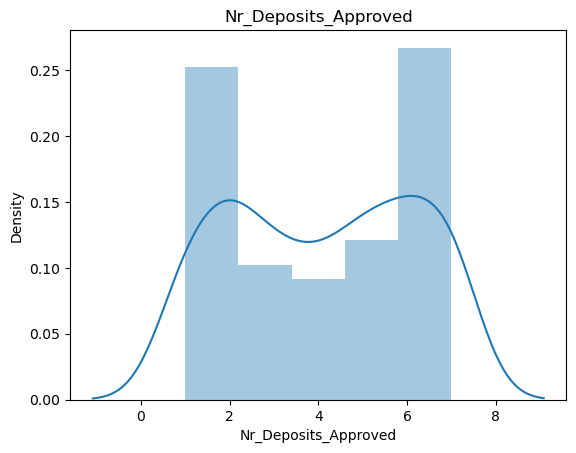

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


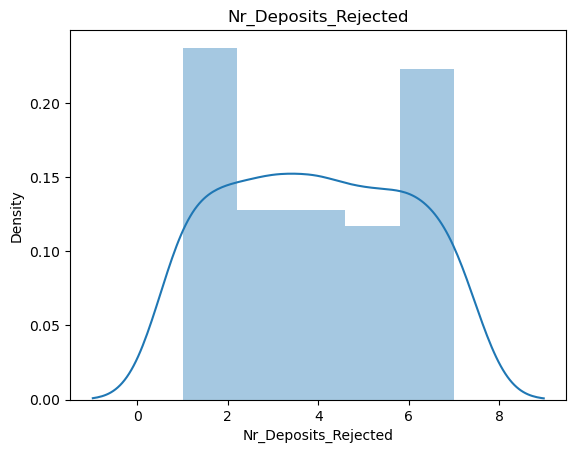

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


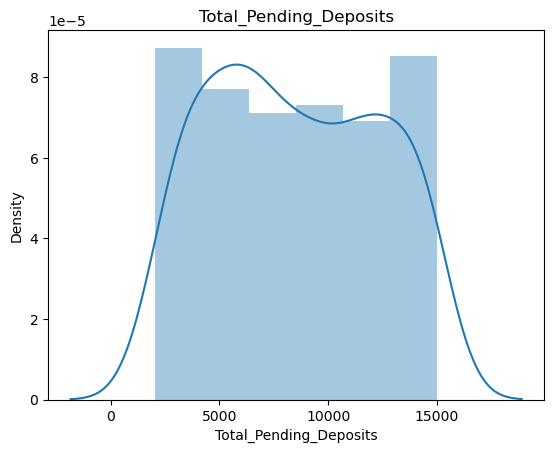

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


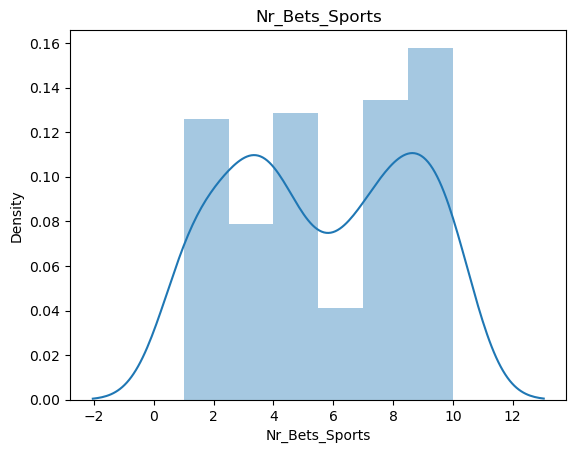

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


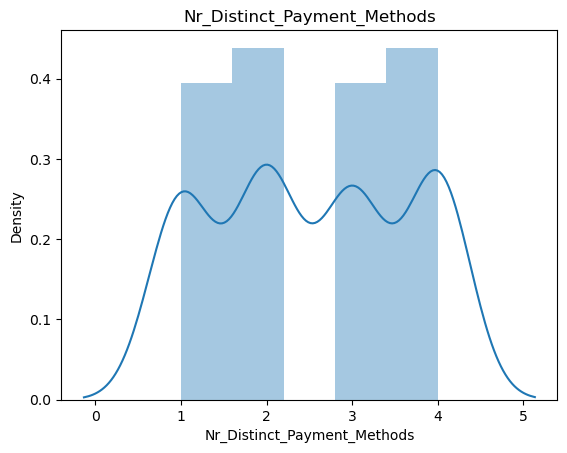

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


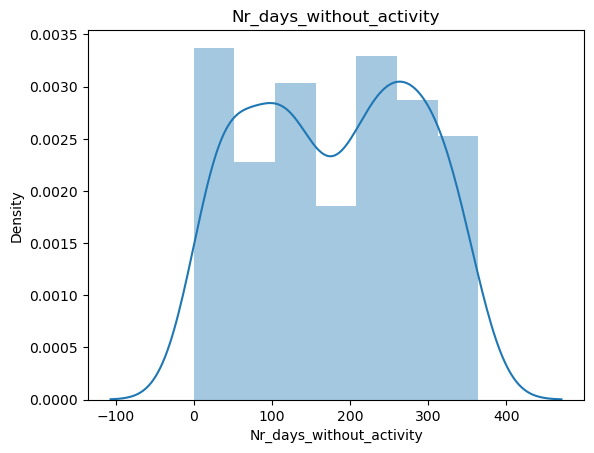

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


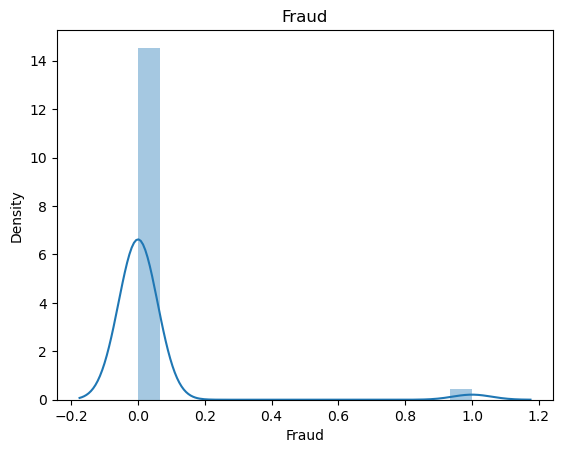

In [18]:
col = ['Age', 'Gender', 'Nr_Deposits_Approved', 'Nr_Deposits_Rejected',
       'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity', 'Fraud']

#distplot
for i in col:
    sns.distplot(fraud[i]);
    plt.title(i);
    plt.show()

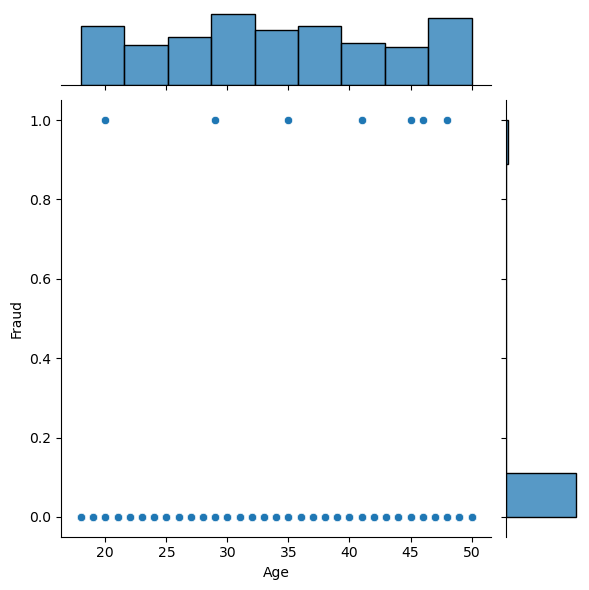

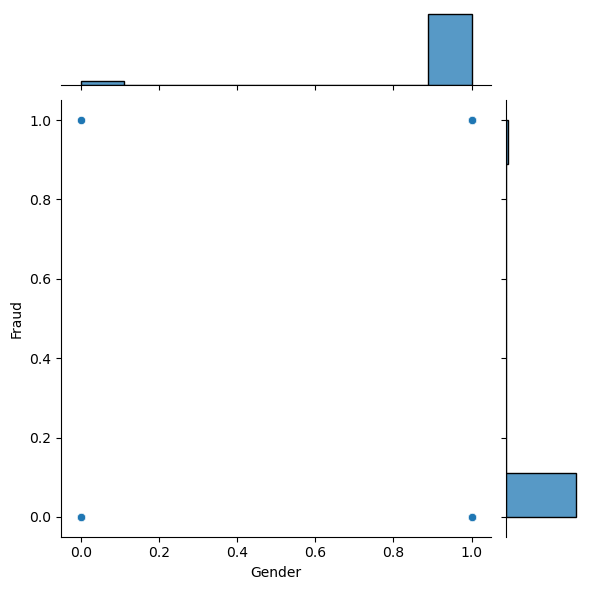

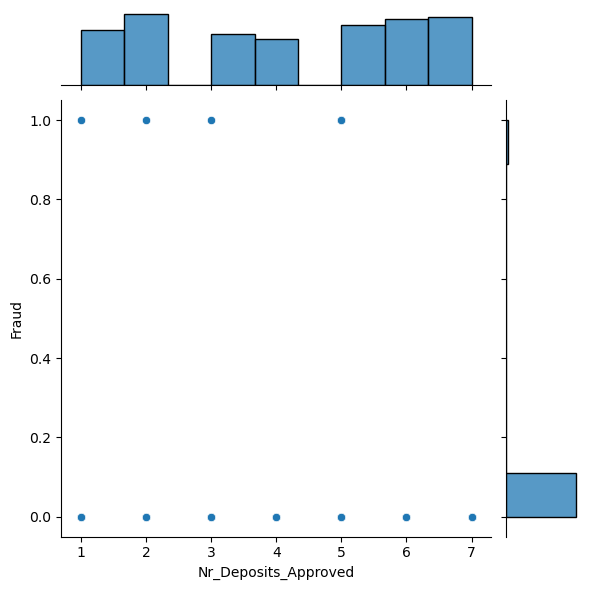

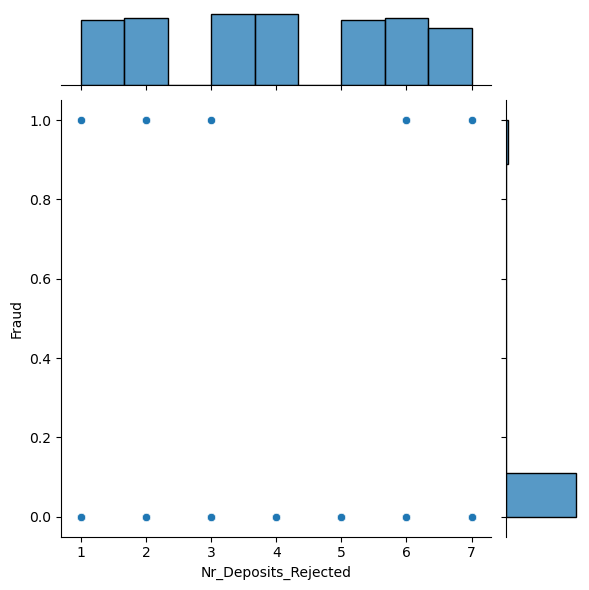

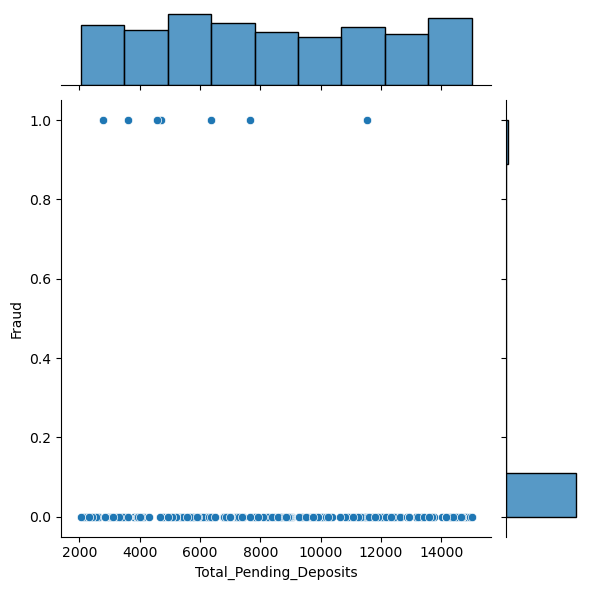

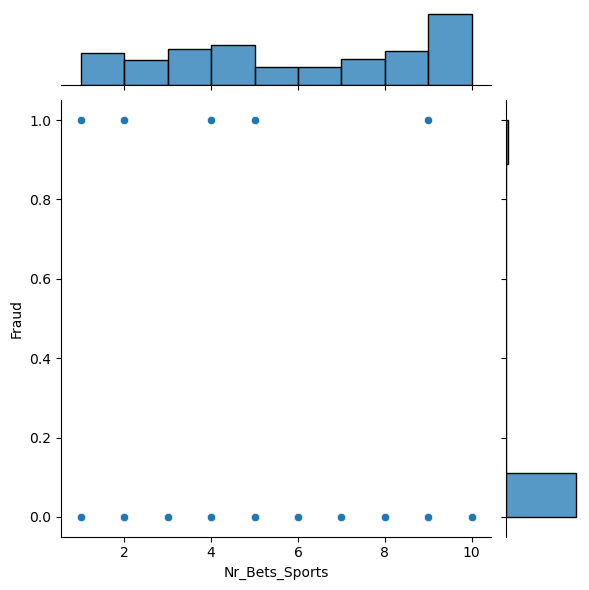

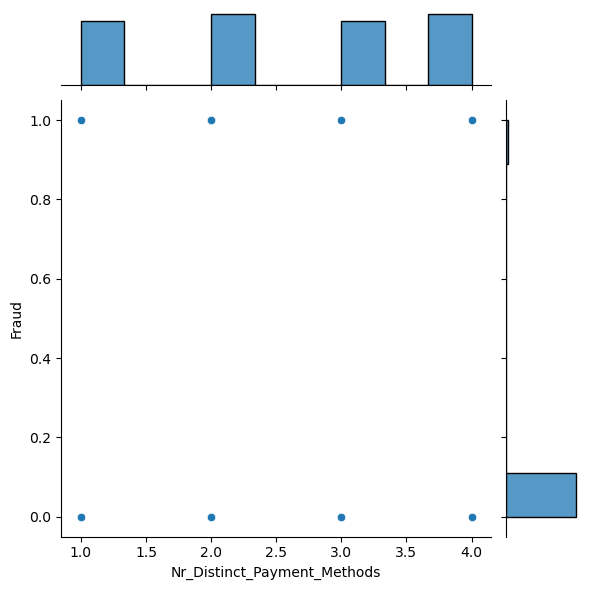

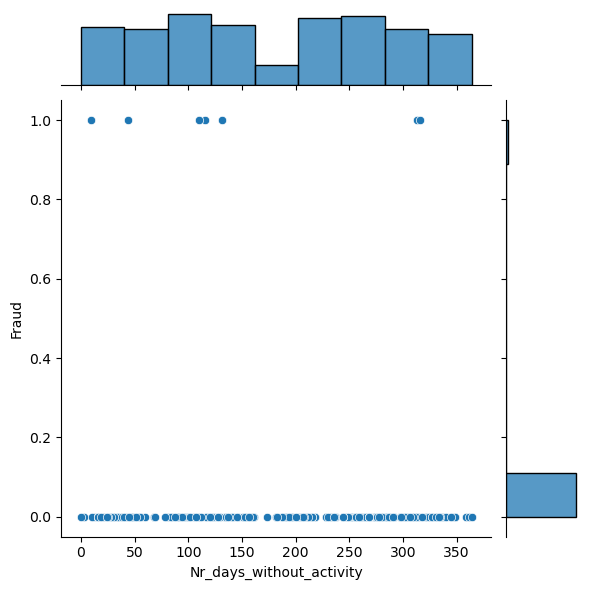

In [19]:
col = ['Age', 'Gender', 'Nr_Deposits_Approved', 'Nr_Deposits_Rejected',
       'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity']

#jointplot
for i in col:
    sns.jointplot(x = fraud[i], y = fraud['Fraud']);
    plt.show()

There are no outliers

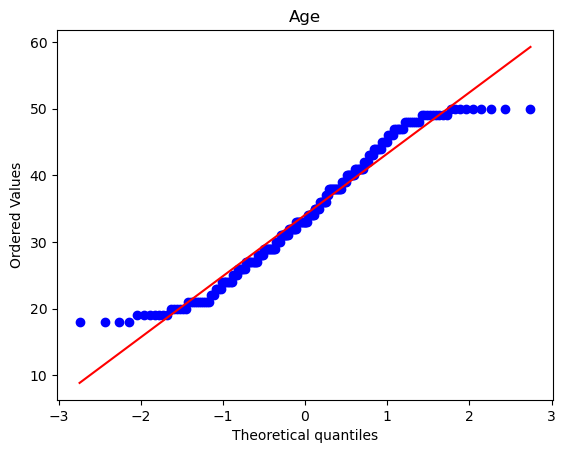

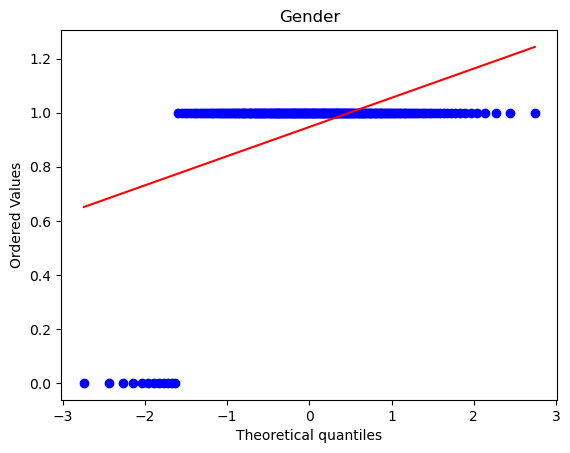

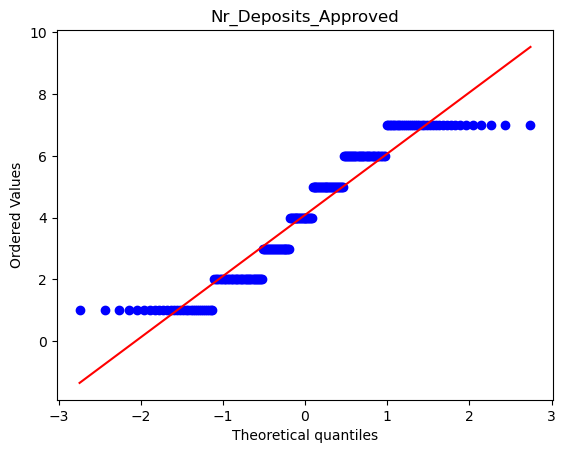

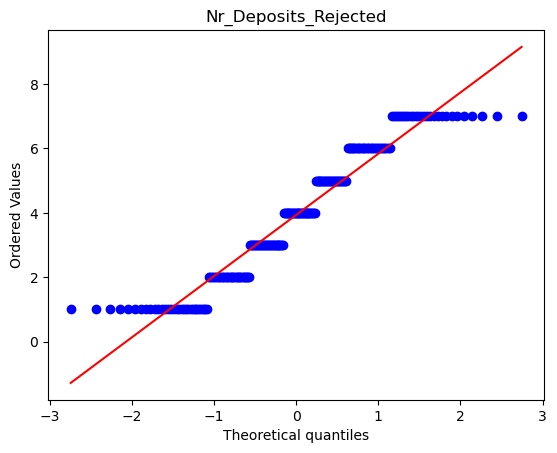

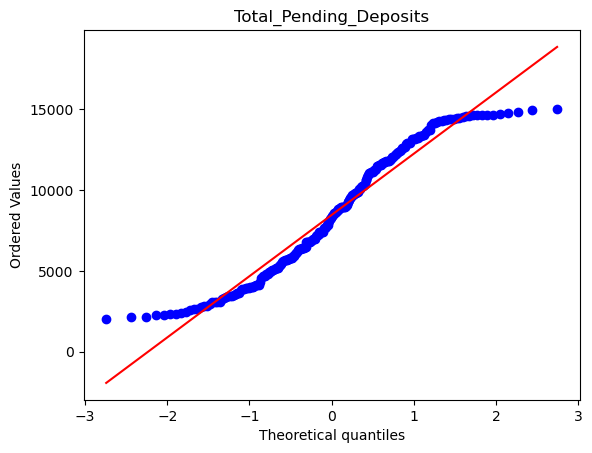

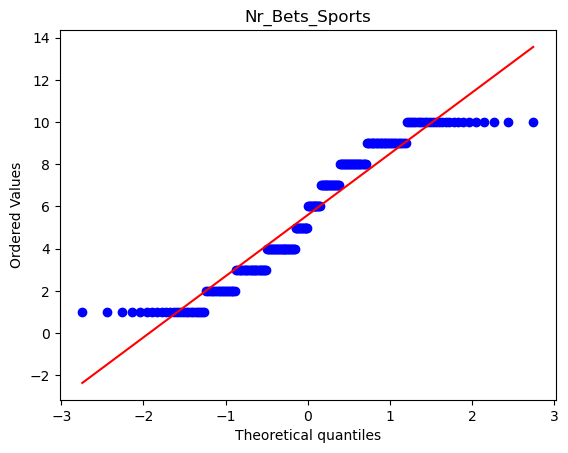

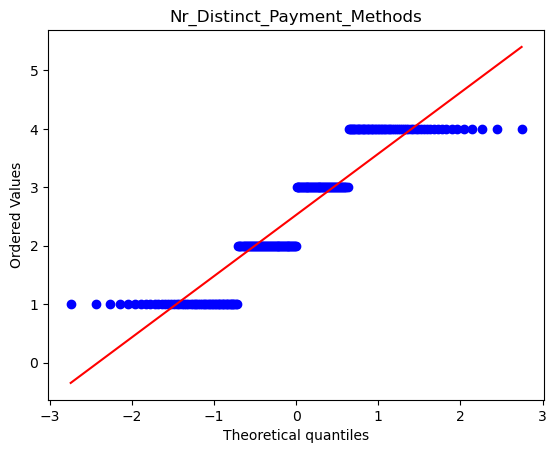

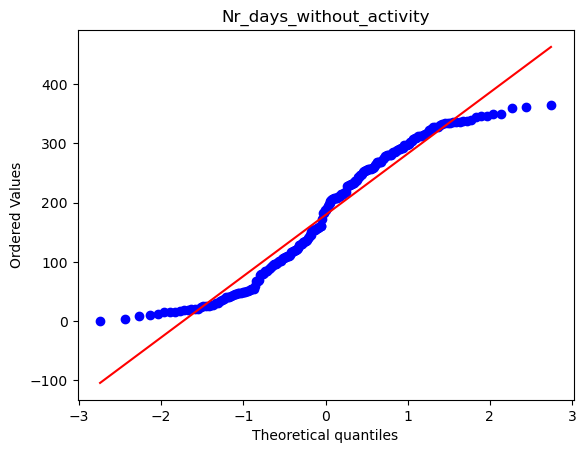

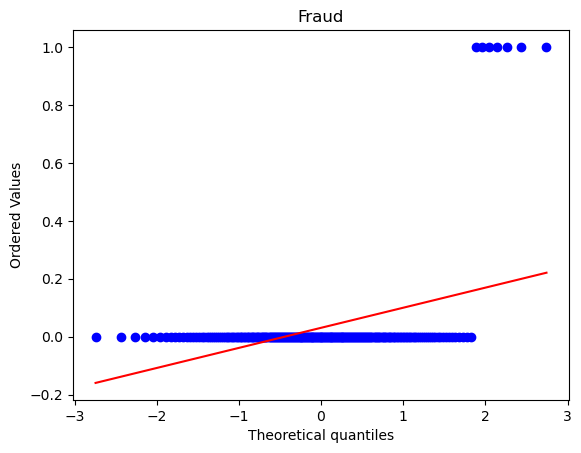

In [20]:
#Q-Q plot
from scipy import stats
import pylab

col = ['Age', 'Gender', 'Nr_Deposits_Approved', 'Nr_Deposits_Rejected',
       'Total_Pending_Deposits', 'Nr_Bets_Sports',
       'Nr_Distinct_Payment_Methods', 'Nr_days_without_activity', 'Fraud']

for i in col:
    stats.probplot(fraud[i], dist = 'norm', plot = pylab)
    plt.title(i)
    plt.show()

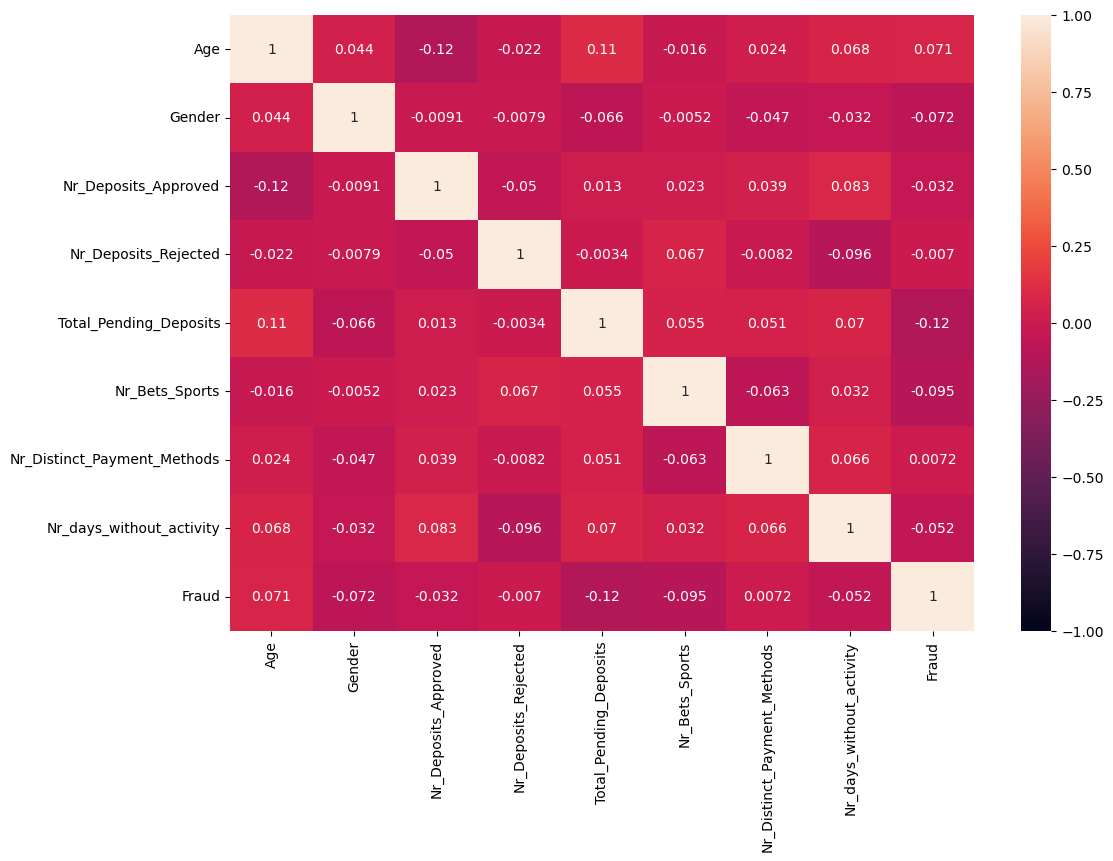

In [21]:
#HeatMap

plt.figure(figsize=(12,8))
sns.heatmap(fraud.corr(), annot = True, vmax = 1, vmin = -1)
plt.show()

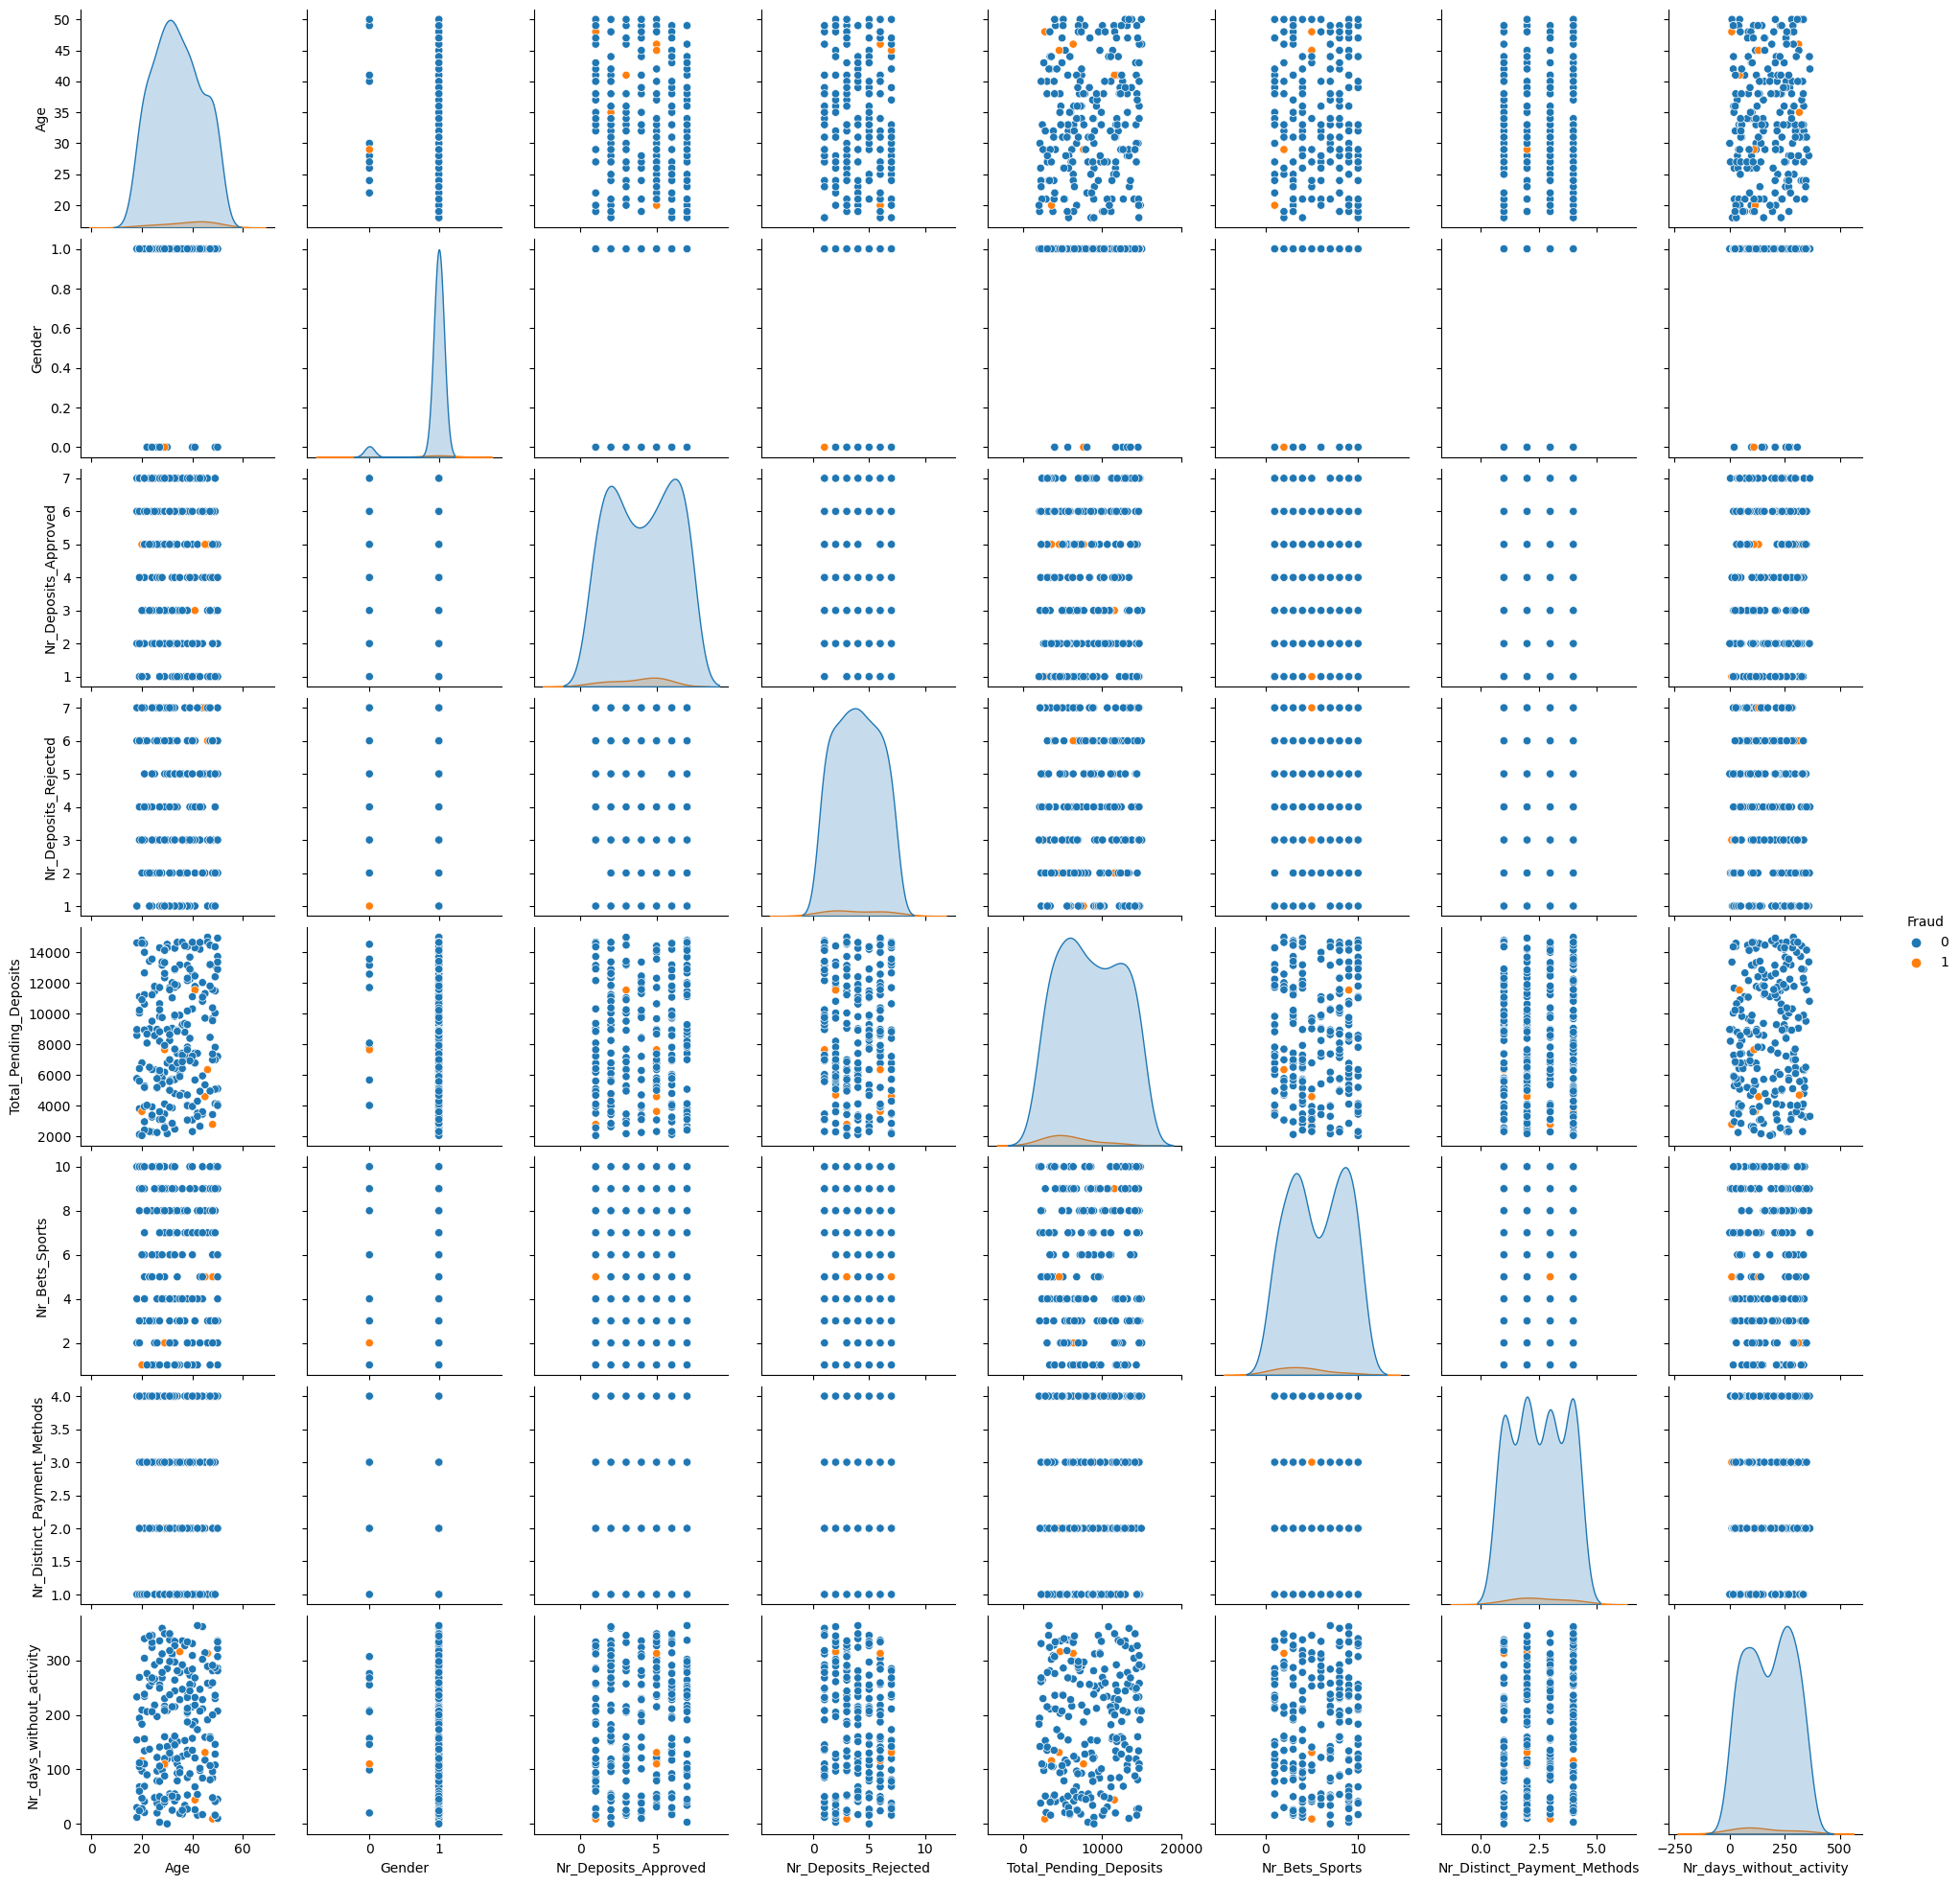

In [22]:
#pairplot
sns.pairplot(fraud, hue = 'Fraud')
plt.show()

In [23]:
#check for varience
fraud.var()

Age                            8.609498e+01
Gender                         5.008115e-02
Nr_Deposits_Approved           4.238967e+00
Nr_Deposits_Rejected           3.832657e+00
Total_Pending_Deposits         1.482281e+07
Nr_Bets_Sports                 8.972158e+00
Nr_Distinct_Payment_Methods    1.254811e+00
Nr_days_without_activity       1.107126e+04
Fraud                          2.989025e-02
dtype: float64

In [24]:
#Skewness
fraud.skew()

Age                            0.093066
Gender                        -4.033523
Nr_Deposits_Approved          -0.042457
Nr_Deposits_Rejected           0.036000
Total_Pending_Deposits         0.089348
Nr_Bets_Sports                -0.016181
Nr_Distinct_Payment_Methods   -0.009459
Nr_days_without_activity      -0.019866
Fraud                          5.476972
dtype: float64

In [25]:
#kurtosis
fraud.kurtosis()

Age                            -1.051835
Gender                         14.395515
Nr_Deposits_Approved           -1.360317
Nr_Deposits_Rejected           -1.199741
Total_Pending_Deposits         -1.231552
Nr_Bets_Sports                 -1.365799
Nr_Distinct_Payment_Methods    -1.364154
Nr_days_without_activity       -1.290639
Fraud                          28.244918
dtype: float64

In [26]:
#Predictors
X = fraud.iloc[:, :-1]

#Target
y = fraud.iloc[:, -1]

In [27]:
X.shape

(228, 8)

In [28]:
y.value_counts()

0    221
1      7
Name: Fraud, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X,y)

In [30]:
y.value_counts()

0    221
1    221
Name: Fraud, dtype: int64

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


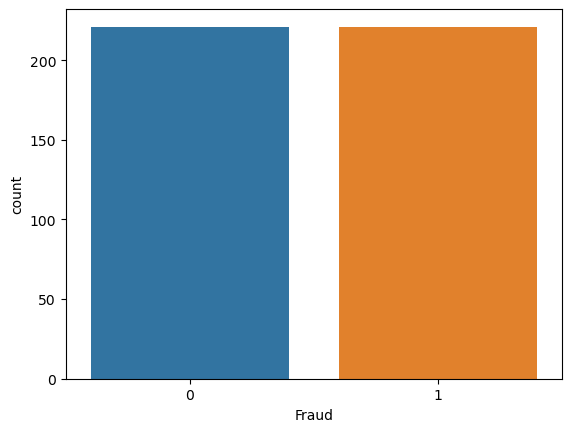

In [31]:
sns.countplot(y);plt.show()

# Model Building


In [32]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape) 
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (353, 8)
X_test shape:  (89, 8)
y_train shape:  (353,)
y_test shape:  (89,)


In [34]:
#standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Auto ML - TPOT

In [36]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, max_time_mins = 60, random_state = 42, verbosity=2)

pipeline_optimizer.fit(X_train, y_train)

print(pipeline_optimizer.score(X_test, y_test))

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9632193158953722

Generation 2 - Current best internal CV score: 0.9773843058350101

Generation 3 - Current best internal CV score: 0.9773843058350101

Generation 4 - Current best internal CV score: 0.9773843058350101

Generation 5 - Current best internal CV score: 0.9858752515090543

Best pipeline: GradientBoostingClassifier(PCA(input_matrix, iterated_power=3, svd_solver=randomized), learning_rate=0.5, max_depth=7, max_features=0.2, min_samples_leaf=16, min_samples_split=17, n_estimators=100, subsample=0.7500000000000001)
0.9775280898876404


C:\Users\Sushri Supravat\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [37]:
pipeline_optimizer.fitted_pipeline_
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [53]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    PCA(iterated_power=3, svd_solver="randomized"),
    GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=0.2, min_samples_leaf=16, min_samples_split=17, n_estimators=100, subsample=0.7500000000000001)
)

In [54]:
exported_pipeline.fit(X_train, y_train)
y_test_pred = exported_pipeline.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(y_test, y_test_pred))
print('Test accuracy is: ', accuracy_score(y_test, y_test_pred))

print('\n')
y_train_pred = exported_pipeline.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print('Train accuracy is: ', accuracy_score(y_train, y_train_pred))

[[47  2]
 [ 0 40]]
Test accuracy is:  0.9775280898876404


[[166   6]
 [  1 180]]
Train accuracy is:  0.9801699716713881


In [64]:
result_test = pd.DataFrame({'Actual': y_test, "Predicted": y_test_pred})
result_test.head(10)

,Actual,Predicted
287,1,1
211,0,0
72,0,0
321,1,1
73,0,1
418,1,1
367,1,1
354,1,1
281,1,1
148,0,0


In [65]:
result_train = pd.DataFrame({'Actual':y_train, "Predicted": y_train_pred})
result_train.head(10)

,Actual,Predicted
17,0,0
66,0,0
137,0,0
245,1,1
31,0,0
84,0,0
360,1,1
390,1,1
369,1,1
94,0,0


In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.95      1.00      0.98        40

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



In [67]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       172
           1       0.97      0.99      0.98       181

    accuracy                           0.98       353
   macro avg       0.98      0.98      0.98       353
weighted avg       0.98      0.98      0.98       353



# Save the model

In [68]:
import pickle
pickle.dump(exported_pipeline, open('fraud.pkl', 'wb'))

In [69]:
# Load the model from disk
model = pickle.load(open('fraud.pkl', 'rb'))
print(model.predict([[29,1,1,4,6188,7,3,216]]))

[0]
